In [1]:
import sys
sys.path.append('../')
from graph_max_shift import *
import matplotlib.pyplot as plt
import pickle

In [2]:
# for plotting
from matplotlib.colors import ListedColormap
colors = ["tab:gray",  "#ED5564", "#4FC1E8", "#FFCE54", "#A0D568", "#AC92EB"]
cmap = ListedColormap(colors)

plt.rc('font',  size = 14)

Reuse the same data as from the hyperparameter tuning plot

In [3]:
n = 10000
weights = [1/4, 3/4]
means = [np.array([.8,-.8]), np.array([-.8,.8])]
covs = [np.array([[(2/3)**2,(7/10)*(2/3)**2], [(7/10)*(2/3)**2, (2/3)**2]]), np.array([[(2/3)**2,0], [0, (2/3)**2]])]

bimodal = GaussianMixture(weights, means, covs)
modes = find_modes(bimodal)

In [6]:
with open('data/bimodal_hyperparameter.pkl', 'rb') as file:
    data, boundaries = pickle.load(file)
graph = GeometricGraph(data, 1, batch_size=10000)
maxshift = GraphMaxShift(graph)

100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


In [7]:
r = .4
h = r
maxshift.cluster(h,r)
clusters = maxshift.reindex_clusters(25) #useful for visualization purposes

100%|██████████| 10000/10000 [00:01<00:00, 6533.87it/s]
C:\Users\codae\Documents\GraphMaxShift\figures\..\graph_max_shift\main.py:173: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:444
  graph_distance = len(self.graph.G.get_shortest_path(i,j)) -1


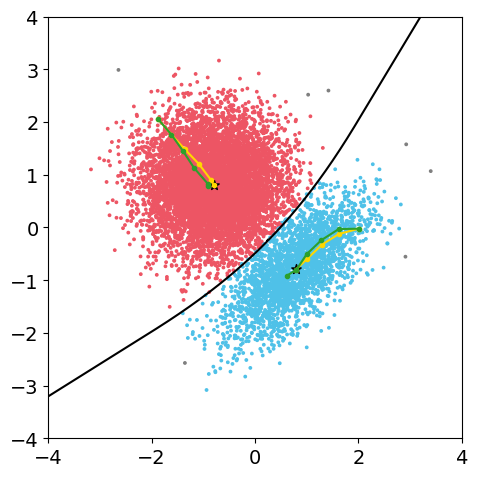

In [8]:
plt.figure(figsize = [5,5])
plt.scatter(data[:,0], data[:,1], c = clusters, cmap = cmap, s = 3, vmin =0, vmax = 6)
for path in boundaries :
    plt.plot(path[:,0], path[:,1], color = 'black')
plt.xlim(-4,4)
plt.ylim(-4,4)

for m in modes:
    plt.scatter(m[0], m[1], marker = "*", s = 50, color = 'black')

max_shift_path = max_shift(data[9762],data, r, bimodal.density)
plt.plot(max_shift_path[:,0], max_shift_path[:,1],  marker = 'o', color = 'gold', markersize=3)

path = maxshift.get_path(9762)
plt.plot(data[path, 0], data[path,1],  marker = 'o', color = 'tab:green', markersize=3)

max_shift_path = max_shift(data[1109],data, r, bimodal.density)
plt.plot(max_shift_path[:,0], max_shift_path[:,1],  marker = 'o', color = 'gold', markersize=3)

path = maxshift.get_path(1109)
plt.plot(data[path, 0], data[path,1],  marker = 'o', color =  'tab:green', markersize=3)


plt.tight_layout()
plt.savefig('plots/paths.png', format='png', dpi=300, bbox_inches='tight')